<br><br><br>
<h1><font color="#B30033" size=5>Sistemas Inteligentes - Curso 2023-2024</font></h1>



<h1><font color="#B30033" size=5>Laboratorio 2: Aprendizaje por refuerzo</font></h1>


<br>
<div estilo="text-align: izquierda">
<font color="#4E70BE" size=3>Profesores:</font><br>
<ul>
<li><font color="#4E70BE" size=3>Juan Carlos Alfaro Jiménez (JuanCarlos.Alfaro@uclm.es)</font><br></li>
<li><font color="#4E70BE" size=3>Mª Julia Flores Gallego (Julia.Flores@uclm.es)</font><br></li>
<li><font color="#4E70BE" size=3> Ismael García Varea (Ismael.Garcia@uclm.es)</font><br></li>
<li><font color="#4E70BE" size=3> Luis González Naharro (Luis.GNaharro@uclm.es)</fuente>
<li><font color="#4E70BE" size=3> Luna Jimenéz Fernández (Luna.Jimenez@uclm.es)</font><br></li>
<li><font color="#4E70BE" size=3> Marina Sokolova (Marina.Sokolova@uclm.es)</font>
<br></li>
</ul>
</div>

<br>
<div estilo="text-align: izquierda">
<font color="#4E70BE" size=3>Alumnos:</font><br>
<ul>
<li><font color="#4E70BE" size=3>Sergio González Velasco (Sergio.Gonzalez35@alu.uclm.es)</font><br></li>
<li><font color="#4E70BE" size=3>Minerva Jiménez Álvarez (Minerva.Jimenez@alu.uclm.es)</font><br></li>

<br></li>
</ul>
</div>

# ¡Rescate Urbano!

### (Versión para RL)




## 1. Introducción


En esta práctica vamos a continuar con el mismo dominio que en la práctica 1: el rescate urbano. Muchos de los elementos que utilizamos en práctica 1 se mantienen, aunque hemos introducido algunas novedades para adaptarlo a la nueva familia de algoritmos. En concreto:

- Una casilla con una persona atrapada se considera un estado terminal.
- Cada persona atrapada tendrá asociado un valor, que básicamente es la recompensa de rescatar a esa persona.
- Habrá peligros como en la práctica 1 con recompensa -5.0, pero podrían existir peligros finales con recompensas negativas mayores, cuyos valores se especificarán en la definición del problema.
- El entorno es estocástico, tal y como hemos visto en el Tema 5. Por ejemplo, si el agente decide hacer la acción 'UP', con una probabilidad de $p$ terminará en la posición esperada, mientras que con una probabilidad $(1-p)/2$ a cada una de las direcciones perpendiculares al movimiento deseado. Por ejemplo, si $p = 0.6$, el agente se encuentra en la casilla (2,3) y la acción es "RIGHT", suponiendo que (1,3), (2,4) y (3,3) no están bloqueadas, 60% de las veces el agente se moverá a la casilla (2,4), el 20% a la (1,3) y otro 20% a la (3,3).

En esta práctica, por tanto, el robot de rescate tendrá que calcular la política óptima que maximice la recompensa final. Dado que rescatar a una persona consiste en alcanzar un estado final, aun habiendo que realizar varios rescates, la tarea será similar a rescatar a **una sola persona**, teniendo en cuenta que algunos rescates serán más rentables que otros.

Como en la práctica 1, la ciudad está representada por una cuadrícula donde cada celda puede tener diferentes estados: bloqueada, libre, con personas atrapadas (con distintas recompensas) o con peligros (algunos de ellos fatales).

### Objetivos:

- Aplicar el algoritmo Q-Learning para el aprendizaje por refuerzo para encontrar la mejor política para maximizar la recompensa a largo plazo.
- Implementar al menos una estrategia de exploración.
- Realizar un análisis del rendimiento del algoritmo propuesto, considerando los diferentes parámetros: $p$ (probabilidad de alcanzar la posición deseada, perteneciente a un entorno estocástico), $r$ (la recompensa inmediata de los estados no finales y no peligrosos), $\alpha$ (la tasa de aprendizaje), $\gamma$ (factor de descuento), y $\epsilon$ (probabilidad de exploración-explotación).

En este trabajo pondremos en práctica las técnicas de aprendizaje por refuerzo vistas en clase. También analizaremos y compararemos el rendimiento del algoritmo implementado, en función de la parametrización y considerando diferentes instancias del problema.

Esperamos que esta práctica os ayude a profundizar la comprensión del aprendizaje por refuerzo, su propósito y os anime a pensar en cómo se pueden aplicar estas técnicas en situaciones del mundo real para ayudar en operaciones de rescate y otras tareas críticas. ¡Buena suerte!

## 2. Descripción del problema

Se trata de resolver un problema en el que un robot tiene que encontrar la mejor estrategia en una situación de rescate de una sola persona, tratando de evitar obstáculos y zonas peligrosas, y sin correr peligros fatales. El espacio de búsqueda está definido por una cuadrícula donde el robot puede moverse en cuatro direcciones: UP, RIGHT, DOWN y LEFT.

Más formalmente, el problema se puede definir como:
- Estados:
    - Libres: casillas transitables por las que se puede pasar sin problemas.
    - Bloqueado: casillas intransitables debido a obstáculos como edificios, paredes, vallas, etc.
    - Personas atrapadas: ubicaciones donde se encuentran grupos de personas que necesitan ser rescatadas, en este caso cada una de ellas tendrá un valor asociado (la recompensa de este rescate).
    - Peligros: áreas con peligros adicionales que pueden retrasar el rescate o incrementar el costo de la ruta (por ejemplo, incendios, áreas inestables, etc.).
    - Peligros Fatales: Peligros que no se pueden superar, una vez que el robot se mete en uno de ellos que averiado o atrapado, lo cual tendrá un coste distinto según el caso concreto.
    - Estado inicial: es el lugar desde donde el robot iniciará cada rescate (y por tanto cada episodio), pero esto es algo que el algoritmo podría cambiar, si así nos piden.
    - Estado final: casilla con una o varias personas atrapadas y por tanto con recompensa positiva, o bien un peligro fatal y por tanto con una recompensa negativa.
- Acciones: posibles movimientos del robot de rescate UP, RIGHT, DOWN, LEFT) desde la celda actual.

El entorno será estocástico, como se explicó anteriormente en la introducción. Por tanto, dado un estado $s$ y una acción $a$, el estado resultante podría ser diferente en función de la estocasiticidad del entorno.

En la carpeta './initial-rl-instances' hay algunos ejemplos de instacias de problemas a resolver.

## 3. Desarrollo de la práctica

Durante el desarrollo de la práctica facilitaremos un conjunto de instancias de problemas a resolver. La dimensionalidad, tanto en el número como en el tipo de celdas, será variable, y los algoritmos implementados deberán ser lo suficientemente eficientes para funcionar correctamente en todas ellas. Algunos otros escenarios se mantendrán para la evaluación/corrección/entrevista, por tanto es importante desarrollar el código de manera que sea lo suficientemente general como para poder resolverlos fácilmente.

### 3.1 Problemas de entrada

Cada escenario tendrá asociado un archivo JSON con la siguiente estructura:

```JSON
{
    "city": {
        "rows": number_of_rows,
        "columns": number_of_columns,
        "blocked": [[x_b1,y_b1],...,[x_bn,y_bn]]
        },
    "departure": [x_init,y_init],            
    "dangers": [[x_d1,y_d1],...,[x_dk, y_dk]],
    "trapped": [[x_t1,y_t1,r_t1],...,[x_tm, y_tm, r_tm]],
    "fatal_dangers": [[x_f1,y_f1,r_f1],...,[x_fz, y_fz, r_fz]],
}
```

Hay cinco claves generales en el archivo JSON:
- `city`: diccionario que representa el escenario del problema.
- `departure`: casilla de salida, es decir, la ubicación inicial del robot.
- `dangers`: lista con las celdas donde hay un peligro.
- `trapped`: lista con las celdas donde hay personas atrapadas y el robot tiene que ir a rescatarlas, junto con el valor de la recompensa asociada a ese rescate. Por ejemplo, [3,2,100] signifiva que la persona a rescatar está en la casilla (x=3,y=2) y la recompensa asociada es 100.
- `fatal_dangers`: lista con las celdas donde se encuentran peligros fatales junto con  el valor de la recompensa **negativa** asociada. Por ejemplo, [7,4,-50] significa que el peligro fatal está en la casilla (x=7,y=4) y la recompensa asociada es -50.

En el diccionario `city`, hay tres claves, al igual que en la práctica 1:
- `rows`: número de filas de la cuadrícula.
- `columns`: número de columnas de la grilla.
- `blocked`: lista con las celdas por donde el robot no puede pasar.

Cada celda de la cuadrícula se define como un par (x,y) (que en formato json se representa como una lista de dos números [x,y]):
- `x`: la coordenada x de la celda o la fila de la cuadrícula.
- `y`: la coordenada y de la celda o la columna de la cuadrícula.

Asumimos que la celda de la esquina superior izquierda es (0,0), y para una celda determinada (x,y), se considera que el eje x crece hacia abajo (filas) y el eje y crece de izquierda a derecha (columnas). Por ejemplo, en la imagen dada el estado inicial sería (6,1). Y la esquina inferior derecha será (9,9), la esquina inferior izquierda será (9,0) y la esquina superior derecha será (0,9).

Un posible ejemplo de este problema podría ser el que se muestra aquí:

<img src="Figure_1.png" alt="Simple example" width="500" height="500"/>

NOTA: En otras aplicaciones (procesamiento de imágenes) estos ejes se intercambian pero este sistema facilitará su trabajo al utilizar listas 2D (matrices) en Python.

## 4. Plan de trabajo

En esta prácticas se deberán realizar las siguientes tareas:

- Diseño del Entorno:
    - Involucra a la ciudad y los elementos que la componen.
    - Implica también la interacción con el agente: determinación de la recompensa y del nuevo estado, una vez que recibe una acción del agente.

- Diseño del algoritmo de aprendizaje por refuerzo:
    - Describir el espacio de estados, e identificarlos en una instancia concreta.
    - Describir las acciones.
    - Describir las recompensas.
    - Distinguir entre estado intermedio y terminal.

- Implementación del Algoritmo Q-Learning:
    - Inicialización de la Q-Tabla.
    - Manejar los parámetros necesarios del algoritmo (alfa, gamma, épsilon, etc.).
    - Regla de actualización.
    - Ejecución de un episodio, que al mismo tiempo, implicará la ejecución de transiciones individuales.
    - Implementar un mecanismo de exploración.
    - Extraer la política de la Q-tabla y actuar en consecuencia a esa política.

- Experimentación y Análisis:
    - Analizar el rendimiento del algoritmo implementado en función de los parámetros y la instancia del problema.
    - Comparar y contrastar los resultados obtenidos de las diferentes parametrizaciones e instancias.

- Memoria:
    - Redactar una memoria detallando el proceso seguido, la definición del entorno, el algoritmo implementado, el rendimiento en función de las configuraciones elegidas y los resultados obtenidos.

En la evaluación del trabajo tendremos en cuenta:
- Correcta implementación del entorno y algoritmo Q-learning: 50%.
- Diseño y uso adecuado de los argumentos, e inclusión exitosa de la exploración: 20%.
- Experimentación y análisis de resultados: 20%.
- Calidad del informe: 10%.

Fechas de presentación de la práctica:
- Fecha límite para enviar el código (libreta): **Viernes 15 de diciembre de 2023**.
- Fecha límite de presentación del informe: **Viernes 22 de diciembre de 2023**.

A continuación se proporcionan más detalles de cada tarea.

### 4.1 Formalización del problema y ejemplos

En primer lugar, este problema de rescate urbano con recompensas debe formalizarse como un problema de aprendizaje por refuerzo: estados, acciones, políticas, etc., definiendo sus elementos básicos. También se debe distinguir el entorno del algoritmo de aprendizaje, teniendo el entorno también elementos importantes: estado, modelo de transición y modelo de recompensa, ya que el entorno proporciona al agente la recompensa obtenida ($r$) y el estado resultante ($s'$), tal y como hemos visto en el tema 5. Todas las implementaciones deben incluir algún mecanismo de exploración y la posibilidad de cambiar fácilmente los distintos argumentos involucrados tanto en el algoritmo como en el entorno. También se debe poder extraer (y dibujar) de la Q-tabla la política que el algoritmo ha aprendido.

### 4.2 Implementación

A continuación, se debe proporcionar el código Python que resuelva la práctica. Debéis codificar vuestra propia estructura de clases: el entorno y el algoritmo de aprendizaje, con al menos los componentes más esenciales:
- para el algoritmo: tasa de aprendizaje, factor de descuento, parámetro de exploración (modificable), extracción de la política aprendida.
- para el entorno: distribución de probabilidad del grado de estocasticidad.

In [2]:
import itertools
import json 
import numpy as np
import os
import random
from draw_policy import *
from time import time
import pandas as pd


class Entorno:
    def __init__(self, entorno_json, penalizacion, pen_peligro, estocasticidad):
        # Bloque de código encargado de cargar el json que ha sido recibido como parámetro
        with open(entorno_json, 'r') as f:
            ciudad = json.load(f)
        # Inicializamos los datos del problema y los almacenamos en variables
        self.filas = ciudad['city']['rows']
        self.columnas = ciudad['city']['columns']
        self.inicio = Estado(ciudad['departure'][0], ciudad['departure'][1])
        self.bloqueados = set(map(tuple, ciudad['city']['blocked']))
        self.peligros = set(map(tuple, ciudad['dangers']))
        self.peligros_fatales = {(x, y): z for x, y, z, in ciudad['fatal_dangers']}
        self.destinos = {(x, y): z for x, y, z, in ciudad['trapped']}
        self.recompensas_finales = list(self.destinos.values()) + list(self.peligros_fatales.values())
        self.penalizacion = penalizacion
        self.penalizacion_peligro = pen_peligro
        self.estocasticidad = estocasticidad

    # Verifica si ese estado está bloqueado
    def es_bloqueado(self, estado):
        return (estado.fila, estado.columna) in self.bloqueados

    # Verifica si es un estado válido, se usará para generar los sucesores y que el agente no se salga de los límites
    def es_valido(self, estado):
        return 0 <= estado.fila < self.filas and 0 <= estado.columna < self.columnas and not self.es_bloqueado(estado)

    # Verifica si es estado de destino
    def es_destino(self, estado):
        return (estado.fila, estado.columna) in self.destinos or (estado.fila, estado.columna) in self.peligros_fatales

    # Verifica si esa acción es válida
    def es_accion_valida(self, accion, estado):
        if accion == 0:
            return self.es_valido(Estado(estado.fila - 1, estado.columna))
        elif accion == 1:
            return self.es_valido(Estado(estado.fila, estado.columna + 1))
        elif accion == 2:
            return self.es_valido(Estado(estado.fila + 1, estado.columna))
        else:
            return self.es_valido(Estado(estado.fila, estado.columna - 1))

    # El agente sólo desea aplicar una accion en base a un estado, es el entorno el encargado de que esa aplicacion se ejecute
    # así como se obtenga la recompensa

    def mover_agente(self, accion_elegida, estado_actual, explorar):
        if explorar:
            accion_elegida = np.random.choice([0, 1, 2, 3])
        nuevo_estado, recompensa = self.aplicar_accion(accion_elegida, estado_actual)
        return nuevo_estado, recompensa

    # Método encargado de aplicar la acción, aquí se tiene en cuenta la estocasticidad del entorno
    # Si el valor es superior a la estocasticidad, se aplica el correspondiente método
    def aplicar_accion(self, accion, estado):
        accion_elegida = accion
        estado_actual = estado
        # Genera un valor entre 0 y 1, si es superior al valor de estocasticidad llamamos al susodicho método
        if np.random.rand() > self.estocasticidad:
            accion_elegida = self.aplicar_estocasticidad(accion)

        if accion_elegida == 0:
            nuevo_estado = Estado(estado.fila - 1, estado.columna)
            if not self.es_valido(nuevo_estado):
                nuevo_estado = estado_actual  # Nos quedamos en el sitio si nos salimos de los límites
            recompensa = self.obtener_recompensa(nuevo_estado)
        elif accion_elegida == 1:
            nuevo_estado = Estado(estado.fila, estado.columna + 1)
            if not self.es_valido(nuevo_estado):
                nuevo_estado = estado_actual  # Nos quedamos en el sitio si nos salimos de los límites
            recompensa = self.obtener_recompensa(nuevo_estado)
        elif accion_elegida == 2:
            nuevo_estado = Estado(estado.fila + 1, estado.columna)
            if not self.es_valido(nuevo_estado):
                nuevo_estado = estado_actual  # Nos quedamos en el sitio si nos salimos de los límites
            recompensa = self.obtener_recompensa(nuevo_estado)
        else:
            nuevo_estado = Estado(estado.fila, estado.columna - 1)
            if not self.es_valido(nuevo_estado):
                nuevo_estado = estado_actual  # Nos quedamos en el sitio si nos salimos de los límites
            recompensa = self.obtener_recompensa(nuevo_estado)
        return nuevo_estado, recompensa

    # Método encargado de la estocasticidad, se aplica a las perpendiculares, tal como viene definido en los apuntes
    def aplicar_estocasticidad(self, accion):
        movimientos = [0, 1, 2, 3]
        restante = 1 - self.estocasticidad
        mitad = restante / 2
        if accion == movimientos[0]:  # Si Arriba
            if np.random.rand() * restante < mitad:
                return movimientos[3]  # Izquierda
            else:
                return movimientos[1]  # Derecha

        if accion == movimientos[1]:  # Si Derecha
            if np.random.rand() * restante < mitad:
                return movimientos[0]  # Arriba
            else:
                return movimientos[2]  # Abajo

        if accion == movimientos[2]:  # Si Abajo
            if np.random.rand() * restante < mitad:
                return movimientos[1]  # Izquierda
            else:
                return movimientos[3]  # Derecha

        if accion == movimientos[3]:  # Si Izquierda
            if np.random.rand() * restante < mitad:
                return movimientos[2]  # Abajo
            else:
                return movimientos[0]  # Arriba

    # Obtención de las recompensas asociadas a cada estado, obtenidas de las variables en forma de diccionario

    def obtener_recompensa(self, estado):

        for destino in self.destinos:
            if (estado.fila, estado.columna) == destino:
                return self.destinos.get(destino)

        for peligro in self.peligros:
            if (estado.fila, estado.columna) == peligro:
                return self.penalizacion_peligro

        for peligro_fatal in self.peligros_fatales:
            if (estado.fila, estado.columna) == peligro_fatal:
                return self.peligros_fatales.get(peligro_fatal)
        return self.penalizacion


# Clase en la que definimos el estado
class Estado:
    def __init__(self, fila, columna):
        self.fila = fila
        self.columna = columna

    def __eq__(self, otro):
        return (self.fila, self.columna) == (otro.fila, otro.columna)

    def __hash__(self):
        return hash((self.fila, self.columna))

    def __repr__(self):
        return str(f"({self.fila},{self.columna})")


class Agente:
    # Constantes para decodificar los movimientos
    mov_numericos = [0, 1, 2, 3]
    direcciones = {
        0: "UP",
        1: "RIGHT",
        2: "DOWN",
        3: "LEFT"
    }
    direcciones_vector = {
        "UP": (-1, 0),
        "RIGHT": (0, 1),
        "DOWN": (1, 0),
        "LEFT": (0, -1)
    }

    def __init__(self, entorno, alpha, gamma, epsilon, decaimiento_epsilon, json_dir, decaimiento_alpha):
        self.entorno = entorno
        self.movimientos = [Agente.direcciones[movimiento] for movimiento in
                            Agente.mov_numericos]  # Arriba, Derecha, Abajo, Izquierda respectivamente
        self.qtabla = np.zeros((entorno.filas, entorno.columnas, len(self.mov_numericos)))
        self.u_tabla = {}
        self.alpha = alpha
        self.alpha_inicial = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.decaimiento_epsilon = decaimiento_epsilon
        self.decaimiento_alpha = decaimiento_alpha
        self.politica = None
        self.json_dir = json_dir
        self.tiempo_ejecucion = None
        self.num_episodios = None

    # El agente sólo desea aplicar una accion en base a un estado, es el entorno el encargado de que esa aplicacion se ejecute
    # así como se obtenga la recompensa
    def realizar_movimiento(self, accion_elegida, estado_actual):
        explorar = np.random.rand() < self.epsilon  # Es el agente quien decide o no explorar
        nuevo_estado, recompensa = self.entorno.mover_agente(accion_elegida, estado_actual, explorar)
        return nuevo_estado, recompensa

    # Se selecciona el máximo valor para un estado en la Q tabla asociada a una accion de las 4 posibles en cada nodo
    def max_q(self, estado):
        posibles_acciones = [self.qtabla[estado.fila][estado.columna][accion] for accion in self.mov_numericos]
        aux = posibles_acciones
        for accion in range(len(aux)):
            if not self.entorno.es_accion_valida(accion, estado):
                # Con esto, descartamos los índices que llevan a acciones no válidas
                # Sin esto el agente se dispersa mucho
                aux[accion] = np.min(self.entorno.recompensas_finales) - 50
        indices_maximos = np.where(aux == np.max(aux))[0]
        accion_elegida = np.random.choice(indices_maximos)  # En caso de tener varios índices iguales
        return accion_elegida

    # Aplicación directa de la fórmula de los apuntes, se encarga de actualizar la Q Tabla
    def actualizar_qtabla(self, estado_actual, accion_elegida, recompensa, nuevo_estado, destino):
        if destino:
            nuevo_valor = (1.0 - self.alpha) * self.qtabla[estado_actual.fila][estado_actual.columna][
                accion_elegida] + self.alpha * recompensa
            self.qtabla[estado_actual.fila][estado_actual.columna][accion_elegida] = nuevo_valor

        else:
            nuevo_valor = (1.0 - self.alpha) * self.qtabla[estado_actual.fila][estado_actual.columna][
                accion_elegida] + self.alpha * (
                                  recompensa + self.gamma * self.qtabla[nuevo_estado.fila][nuevo_estado.columna][
                              self.max_q(nuevo_estado)])
            self.qtabla[estado_actual.fila][estado_actual.columna][accion_elegida] = nuevo_valor
        return nuevo_valor

    # Ejecución del algoritmo en función del número de episodios
    def ejecutar_algoritmo(self, num_episodios):
        self.num_episodios = num_episodios
        self.tiempo_ejecucion = time()
        for i in range(self.num_episodios):
            self.episodio()
        self.tiempo_ejecucion = time() - self.tiempo_ejecucion
        return self.obtener_politica()

    # Método encargado de aplicar un episodio, finaliza cuando llega a un estado de meta y actualiza la Q Tabla
    # Aplicación directa del pseucocódigo de los apuntes
    def episodio(self):
        estado_actual = self.entorno.inicio
        destino = False
        while not destino:
            accion_elegida = self.max_q(estado_actual)
            nuevo_estado, recompensa = self.realizar_movimiento(accion_elegida, estado_actual)
            if self.entorno.es_destino(nuevo_estado):
                destino = True
                # Decaimiento de épsilon en cada final de episodio
                self.epsilon *= self.decaimiento_epsilon
                # Decaimiento de Alpha en cada final de episodio
                # Evita que en valores altos de Alpha los valores se estabilicen y disparan el tiempo de ejecucion del algoritmo
                # Valores bajos retrasan la convergencia 
                # con el decaimiento de Alpha encontramos un equilibrio
                self.alpha = self.alpha_inicial * self.decaimiento_alpha ** self.num_episodios
            self.actualizar_qtabla(estado_actual, accion_elegida, recompensa, nuevo_estado, destino)
            estado_actual = nuevo_estado

    # Con esto obtenemos la política dentro de todos los estados posibles que no sean ni destinos ni bloqueados
    # En función de los valores máximos de la Q Tabla en cada nodo
    def obtener_politica(self):
        politica = {}
        estados_posibles = [(fila, columna) for fila in range(self.entorno.filas) for columna in
                            range(self.entorno.columnas)]
        for estado in estados_posibles:
            if estado not in self.entorno.destinos and estado not in self.entorno.peligros_fatales and estado not in self.entorno.bloqueados:
                politica[estado[0], estado[1]] = self.direcciones.get(self.max_q(Estado(estado[0], estado[1])))
        self.politica = politica
        self.estadisticas()
        return politica

    def estadisticas(self, iterativa=False):
        # En función de si es llamada desde iteratición de políticas o no, imprime las estadísticas pertinentes
        if iterativa:
            df = pd.DataFrame(list(self.u_tabla.items()), index=None, columns=['Estado', 'Valor'])
            print("----ITERACIÓN DE POLÍTICAS----")
            print("\n ")
            print(f"Número de iteraciones realizadas: {self.num_episodios}")
            print(f"Tiempo de ejecución: {self.tiempo_ejecucion}")
            print("\n ")
            print("----Tabla de utilidades final----")
            print("\n ")
            print(df.to_string(index=False))
            print("\n ")
            print("----POLÍTICA OBTENIDA CON ITERACIÓN DE POLÍTICAS----")
            for estado, accion in self.politica.items():
                print(f"\"({estado[0]}, {estado[1]})\": \"{accion}\"")
            print("----MAPA DE LA POLÍTICA CON ITERACIÓN DE POLÍTICAS----")
            print("\n ")
            draw_policy_map(json_dir, self.politica)
        else:
            destinos = []
            for estados in self.entorno.destinos.keys():
                destinos.append(estados)
            print("----ALGORITMO QLEARNING----")
            print("\n ")
            print(f"Número de episodios: {self.num_episodios}")
            print(f"Estado inicial: {self.entorno.inicio}")
            print(f"Personas a rescatar: {destinos}")
            print(f"Tamaño de la ciudad: {self.entorno.filas} x {self.entorno.columnas}")
            print(f"Tiempo de ejecución del Algoritmo: {self.tiempo_ejecucion:.2f} segundos")
            print("\n ")
            print("----QTabla----")
            print("\n ")
            print(self.qtabla)
            print("\n ")
            print("----POLÍTICA OBTENIDA CON QQLEARNING----")
            for estado, accion in self.politica.items():
                print(f"\"({estado[0]}, {estado[1]})\": \"{accion}\"")
            print("----MAPA DE LA POLÍTICA OBTENIDA QQLEARNING----")
            print("\n ")
            draw_policy_map(json_dir, self.politica)

    # ---------------------------------- EJERCICIO PARTE EXTRAORDINARIA ----------------------------------
    def iteracion_de_politicas(self):
        estados_posibles = [(fila, columna) for fila in range(self.entorno.filas) for columna in
                            range(self.entorno.columnas) if (fila, columna) not in self.entorno.bloqueados]
        # Inicializamos la Tabla de Utilidades
        for estado in estados_posibles:
            e = Estado(estado[0], estado[1])
            if self.entorno.es_destino(e):
                d_aux = {estado: self.entorno.obtener_recompensa(e)}
                self.u_tabla.update(d_aux)
            else:
                d_aux = {estado: 0}
                self.u_tabla.update(d_aux)
        # Iniciamos las iteraciones
        self.tiempo_ejecucion = time()
        for _ in range(self.num_episodios):
            # Iteramos sobre la política inicial
            self.evaluacion_de_politica(estados_posibles)
            # Mejoramos la política que utilizará la iteración siguiente
            self.mejora_politica()
        self.tiempo_ejecucion = time() - self.tiempo_ejecucion
        self.estadisticas(True)
        return self.politica

    def evaluacion_de_politica(self, estados_posibles):
        for estado in estados_posibles:
            estado_actual = Estado(estado[0], estado[1])
            if not self.entorno.es_destino(estado_actual):
                siguiente_estado = self.siguiente_estado(estado)
                recompensa = self.entorno.obtener_recompensa(estado_actual)
                # Tenemos en cuenta el siguiente estado con su probabilidad y las perpendiculares en un entorno estocástico
                # Esto devuelve el sumatorio de la probabilidad de la acción de la política y de la % de sus perpendiculares
                sumatorio_transicion_y_utilidad = self.transicion_y_utilidad(estado,siguiente_estado)
                self.u_tabla[estado] = recompensa + self.gamma * sumatorio_transicion_y_utilidad

    def transicion_y_utilidad(self, estado, estado_siguiente):
            accion_v = (estado_siguiente[0] - estado[0], estado_siguiente[1] - estado[1])
            # Sumatorio de para una acción el prob T(s,a,s')*U(s') y de sus perpendiculares
            # Por ejemplo para estocasticidad 80% -> T80%(s,a1,s1)*U(s1) + T10%(s,a2,s2)*U(s2) + T10%(s,a3,s3)*U(s3)
            # Si no es válida una perpendicular o el entorno es determinista automáticamente sólo saca un T(s,a,s')*U(s') ya que el resto es 0
            if accion_v == (-1,0): # Arriba
                accion_1 = self.entorno.estocasticidad * self.u_tabla[estado_siguiente]
                perpendicular_1_prob = ((1 - self.entorno.estocasticidad) / 2)
                estado_perpendicular_1 = (estado[0], estado[1]+1) # Derecha
                if self.entorno.es_valido(Estado(estado_perpendicular_1[0], estado_perpendicular_1[1])):
                    accion_2 =  perpendicular_1_prob * self.u_tabla[estado_perpendicular_1]
                else: 
                    accion_2 = 0
                estado_perpendicular_2 = (estado[0], estado[1]-1) # Izquierda
                if self.entorno.es_valido(Estado(estado_perpendicular_2[0], estado_perpendicular_2[1])):
                    accion_3 =  perpendicular_1_prob * self.u_tabla[estado_perpendicular_2]
                else: 
                    accion_3 = 0
                return np.sum(accion_1 + accion_2 + accion_3)
            elif accion_v == (0,1): # Derecha
                accion_1 = self.entorno.estocasticidad * self.u_tabla[estado_siguiente]
                perpendicular_1_prob = ((1 - self.entorno.estocasticidad) / 2)
                estado_perpendicular_1 = (estado[0]+1, estado[1]) # Abajo
                if self.entorno.es_valido(Estado(estado_perpendicular_1[0], estado_perpendicular_1[1])):
                    accion_2 =  perpendicular_1_prob * self.u_tabla[estado_perpendicular_1]
                else: 
                    accion_2 = 0
                estado_perpendicular_2 = (estado[0]-1, estado[1]) # Arriba
                if self.entorno.es_valido(Estado(estado_perpendicular_2[0], estado_perpendicular_2[1])):
                    accion_3 =  perpendicular_1_prob * self.u_tabla[estado_perpendicular_2]
                else: 
                    accion_3 = 0
                return np.sum(accion_1 + accion_2 + accion_3)
            elif accion_v == (1,0): # Abajo
                accion_1 = self.entorno.estocasticidad * self.u_tabla[estado_siguiente]
                perpendicular_1_prob = ((1 - self.entorno.estocasticidad) / 2)
                estado_perpendicular_1 = (estado[0], estado[1] + 1) # Derecha
                if self.entorno.es_valido(Estado(estado_perpendicular_1[0], estado_perpendicular_1[1])):
                    accion_2 =  perpendicular_1_prob * self.u_tabla[estado_perpendicular_1]
                else: 
                    accion_2 = 0
                estado_perpendicular_2 = (estado[0], estado[1] - 1) # Izquierda
                if self.entorno.es_valido(Estado(estado_perpendicular_2[0], estado_perpendicular_2[1])):
                    accion_3 =  perpendicular_1_prob * self.u_tabla[estado_perpendicular_2]
                else: 
                    accion_3 = 0
                return np.sum(accion_1 + accion_2 + accion_3)
            else: # Izquierda
                accion_1 = self.entorno.estocasticidad * self.u_tabla[estado_siguiente]
                perpendicular_1_prob = ((1 - self.entorno.estocasticidad) / 2)
                estado_perpendicular_1 = (estado[0] + 1, estado[1]) # Abajo
                if self.entorno.es_valido(Estado(estado_perpendicular_1[0], estado_perpendicular_1[1])):
                    accion_2 =  perpendicular_1_prob * self.u_tabla[estado_perpendicular_1]
                else: 
                    accion_2 = 0
                estado_perpendicular_2 = (estado[0] - 1, estado[1]) # Arriba
                if self.entorno.es_valido(Estado(estado_perpendicular_2[0], estado_perpendicular_2[1])):
                    accion_3 =  perpendicular_1_prob * self.u_tabla[estado_perpendicular_2]
                else: 
                    accion_3 = 0
                return np.sum(accion_1 + accion_2 + accion_3)

    def mejora_politica(self):
        politica_aux = {}
        max_estado = None
        # Valor de mejora iniciado a menos infinito
        valor = float('-inf')
        estados_posibles = [(fila, columna) for fila in range(self.entorno.filas) for columna in
                            range(self.entorno.columnas)]

        for estado in estados_posibles:
            if estado not in self.entorno.destinos and estado not in self.entorno.peligros_fatales and estado not in self.entorno.bloqueados:
                # Miramos los sucesores de ese estado, es decir, transiciones válidas en el entorno
                sucesores = self.sucesores(estado)
                for nuevo_estado in sucesores:
                    # Calculamos el valor para esa accion que conlleva a un nuevo estado sucesor
                    actual = self.transicion_y_utilidad(estado,nuevo_estado)
                    if actual > valor:
                        # Si hay mejora actualizamos y determinamos el nuevo estado al que transicionar 
                        valor = actual
                        max_estado = nuevo_estado

                # Calculamos la diferencia para determinar qué accion ha llevado a ese estado y decodificarla en su string
                accion_v = (max_estado[0] - estado[0], max_estado[1] - estado[1])
                accion = self.decodificar_accion(accion_v)
                # Nos quedamos con esa acción y actualizamos la política
                politica_aux.update({(estado[0], estado[1]): accion})
                # Reseteamos los valores para el siguiente estado
                valor = float('-inf')
                actual = None
        self.politica = politica_aux

    # Simplemente para una accion devuelve el string al que corresponde
    def decodificar_accion(self, accion):
        for key, value in self.direcciones_vector.items():
            if value == accion:
                return key

    # Sucesores válidos para un determinado estado
    def sucesores(self, estado):
        movimientos = [(-1, 0), (0, 1), (1, 0), (0, -1)]
        sucesores = []
        for mx, my in movimientos:
            nueva_fila = estado[0] + mx
            nueva_columna = estado[1] + my
            if self.entorno.es_valido(Estado(nueva_fila, nueva_columna)):
                sucesores.append((nueva_fila, nueva_columna))
        return sucesores

    # Cálculo del siguiente estado en la política 
    def siguiente_estado(self, estado):
        aux = self.politica.get(estado)
        accion = self.direcciones_vector.get(aux)
        nueva_fila = estado[0] + accion[0]
        nueva_columna = estado[1] + accion[1]
        siguiente_estado = (nueva_fila, nueva_columna)
        return siguiente_estado



# Main principal con semillas

----SEMILLA 1----


Penalización del entorno: -0.5
Penalización de peligro: -1
Estocasticidad del entorno: 0.7
Número de episodios: 1000
Alpha: 0.2
Gamma: 0.2
Epsilon: 0.2
Decaimiento de epsilon: 0.02
Decaimiento de alpha: 0.99


----ALGORITMO QLEARNING----

 
Número de episodios: 1000
Estado inicial: (2,0)
Personas a rescatar: [(0, 3)]
Tamaño de la ciudad: 3 x 4
Tiempo de ejecución del Algoritmo: 1.91 segundos

 
----QTabla----

 
[[[ 0.         -0.01570119 -0.1         0.        ]
  [ 0.         -0.01059669  0.         -0.01059328]
  [ 0.         -0.1        -0.0036861  -0.00370974]
  [ 0.          0.          0.          0.        ]]

 [[-0.10679774  0.         -0.10679629  0.        ]
  [ 0.          0.          0.          0.        ]
  [-0.00477058 -0.1        -0.00477688  0.        ]
  [ 0.          0.          0.          0.        ]]

 [[-0.11101707 -0.18        0.          0.        ]
  [ 0.         -0.10565665  0.         -0.10565439]
  [-0.1        -0.00617469  0.         -

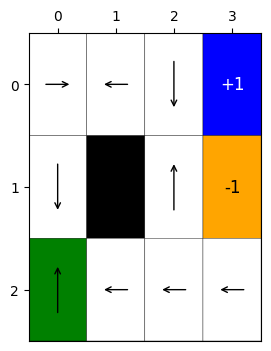

----ITERACIÓN DE POLÍTICAS----

 
Número de iteraciones realizadas: 1000
Tiempo de ejecución: 0.2411503791809082

 
----Tabla de utilidades final----

 
Estado     Valor
(0, 0) -0.594897
(0, 1) -0.552848
(0, 2) -0.377485
(0, 3)  1.000000
(1, 0) -0.583286
(1, 2) -0.582848
(1, 3) -1.000000
(2, 0) -0.599177
(2, 1) -0.583885
(2, 2) -0.599229
(2, 3) -0.613892

 
----POLÍTICA OBTENIDA CON ITERACIÓN DE POLÍTICAS----
"(0, 0)": "RIGHT"
"(0, 1)": "RIGHT"
"(0, 2)": "RIGHT"
"(1, 0)": "UP"
"(1, 2)": "UP"
"(2, 0)": "UP"
"(2, 1)": "LEFT"
"(2, 2)": "LEFT"
"(2, 3)": "LEFT"
----MAPA DE LA POLÍTICA CON ITERACIÓN DE POLÍTICAS----

 


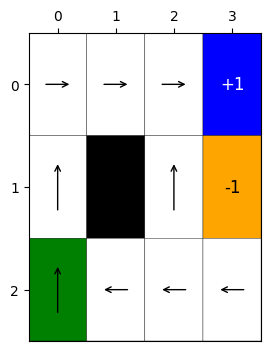



----SEMILLA 2----


Penalización del entorno: -0.5
Penalización de peligro: -10
Estocasticidad del entorno: 0.7
Número de episodios: 100
Alpha: 0.5
Gamma: 0.5
Epsilon: 0.3
Decaimiento de epsilon: 0.01
Decaimiento de alpha: 0.995


----ALGORITMO QLEARNING----

 
Número de episodios: 100
Estado inicial: (2,0)
Personas a rescatar: [(0, 3)]
Tamaño de la ciudad: 3 x 4
Tiempo de ejecución del Algoritmo: 0.06 segundos

 
----QTabla----

 
[[[ 0.         -0.72577304 -0.87623819  0.        ]
  [ 0.         -0.48065188  0.         -0.69186908]
  [ 0.          0.46401407 -0.0573636  -0.20003574]
  [ 0.          0.          0.          0.        ]]

 [[-0.88385475  0.         -0.95698878  0.        ]
  [ 0.          0.          0.          0.        ]
  [-0.77620508 -0.82879042 -0.80771563  0.        ]
  [ 0.          0.          0.          0.        ]]

 [[-0.96228817 -0.96990959  0.          0.        ]
  [ 0.         -0.96148497  0.         -0.96421706]
  [-0.90482955 -0.93318942  0.        

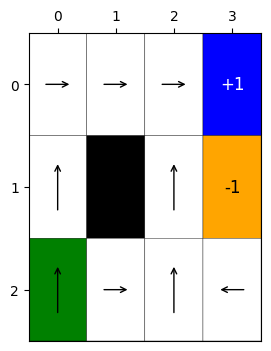

----ITERACIÓN DE POLÍTICAS----

 
Número de iteraciones realizadas: 100
Tiempo de ejecución: 0.02350902557373047

 
----Tabla de utilidades final----

 
Estado     Valor
(0, 0) -0.756658
(0, 1) -0.569416
(0, 2) -0.198331
(0, 3)  1.000000
(1, 0) -0.764830
(1, 2) -0.644416
(1, 3) -1.000000
(2, 0) -0.826829
(2, 1) -0.788508
(2, 2) -0.824309
(2, 3) -0.863508

 
----POLÍTICA OBTENIDA CON ITERACIÓN DE POLÍTICAS----
"(0, 0)": "RIGHT"
"(0, 1)": "RIGHT"
"(0, 2)": "RIGHT"
"(1, 0)": "UP"
"(1, 2)": "UP"
"(2, 0)": "UP"
"(2, 1)": "RIGHT"
"(2, 2)": "LEFT"
"(2, 3)": "LEFT"
----MAPA DE LA POLÍTICA CON ITERACIÓN DE POLÍTICAS----

 


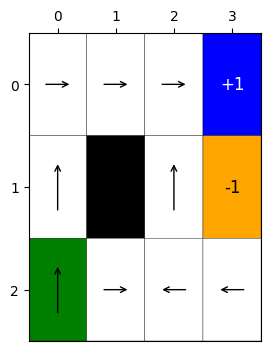



----SEMILLA 3----


Penalización del entorno: -0.5
Penalización de peligro: -10
Estocasticidad del entorno: 0.9
Número de episodios: 1000
Alpha: 0.2
Gamma: 0.5
Epsilon: 0.2
Decaimiento de epsilon: 0.02
Decaimiento de alpha: 0.99


----ALGORITMO QLEARNING----

 
Número de episodios: 1000
Estado inicial: (2,0)
Personas a rescatar: [(0, 3)]
Tamaño de la ciudad: 3 x 4
Tiempo de ejecución del Algoritmo: 0.84 segundos

 
----QTabla----

 
[[[ 0.         -0.10031464 -0.11        0.        ]
  [ 0.         -0.10013508  0.         -0.10013211]
  [ 0.          0.00028919  0.         -0.1       ]
  [ 0.          0.          0.          0.        ]]

 [[-0.10018261  0.         -0.18        0.        ]
  [ 0.          0.          0.          0.        ]
  [-0.1        -0.00074673 -0.0007541   0.        ]
  [ 0.          0.          0.          0.        ]]

 [[-0.19       -0.10442666  0.          0.        ]
  [ 0.         -0.18924923  0.         -0.19      ]
  [-0.1        -0.01116029  0.       

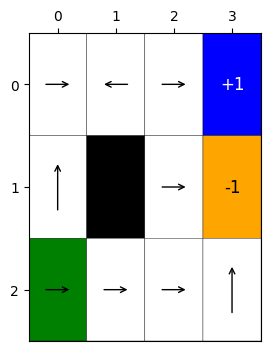

----ITERACIÓN DE POLÍTICAS----

 
Número de iteraciones realizadas: 1000
Tiempo de ejecución: 0.2328331470489502

 
----Tabla de utilidades final----

 
Estado     Valor
(0, 0) -0.758967
(0, 1) -0.528729
(0, 2) -0.063843
(0, 3)  1.000000
(1, 0) -0.841535
(1, 2) -0.553729
(1, 3) -1.000000
(2, 0) -0.900108
(2, 1) -0.856687
(2, 2) -0.792638
(2, 3) -0.881687

 
----POLÍTICA OBTENIDA CON ITERACIÓN DE POLÍTICAS----
"(0, 0)": "RIGHT"
"(0, 1)": "RIGHT"
"(0, 2)": "RIGHT"
"(1, 0)": "UP"
"(1, 2)": "UP"
"(2, 0)": "UP"
"(2, 1)": "RIGHT"
"(2, 2)": "UP"
"(2, 3)": "LEFT"
----MAPA DE LA POLÍTICA CON ITERACIÓN DE POLÍTICAS----

 


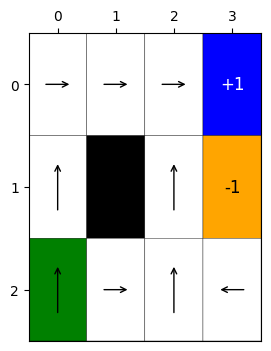



----SEMILLA 4----


Penalización del entorno: -0.04
Penalización de peligro: -5
Estocasticidad del entorno: 0.8
Número de episodios: 500
Alpha: 0.5
Gamma: 0.5
Epsilon: 0.5
Decaimiento de epsilon: 0.02
Decaimiento de alpha: 0.99


----ALGORITMO QLEARNING----

 
Número de episodios: 500
Estado inicial: (2,0)
Personas a rescatar: [(0, 3)]
Tamaño de la ciudad: 3 x 4
Tiempo de ejecución del Algoritmo: 0.36 segundos

 
----QTabla----

 
[[[ 0.         -0.0539895  -0.06090892  0.        ]
  [ 0.          0.04643533  0.         -0.05727295]
  [ 0.          0.65481393 -0.03       -0.0275    ]
  [ 0.          0.          0.          0.        ]]

 [[-0.06637167  0.         -0.06638026  0.        ]
  [ 0.          0.          0.          0.        ]
  [ 0.02279143 -0.05135711 -0.05000787  0.        ]
  [ 0.          0.          0.          0.        ]]

 [[-0.06953811 -0.06953746  0.          0.        ]
  [ 0.         -0.0630463   0.         -0.06306096]
  [-0.04766742 -0.04819819  0.         

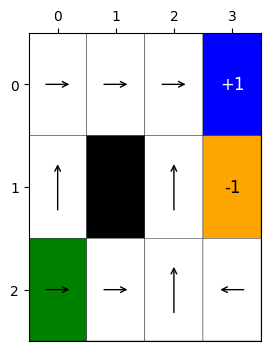

----ITERACIÓN DE POLÍTICAS----

 
Número de iteraciones realizadas: 500
Tiempo de ejecución: 0.11652231216430664

 
----Tabla de utilidades final----

 
Estado     Valor
(0, 0)  0.000042
(0, 1)  0.105102
(0, 2)  0.362755
(0, 3)  1.000000
(1, 0) -0.039983
(1, 2)  0.055102
(1, 3) -1.000000
(2, 0) -0.058503
(2, 1) -0.050191
(2, 2) -0.025478
(2, 3) -0.100191

 
----POLÍTICA OBTENIDA CON ITERACIÓN DE POLÍTICAS----
"(0, 0)": "RIGHT"
"(0, 1)": "RIGHT"
"(0, 2)": "RIGHT"
"(1, 0)": "UP"
"(1, 2)": "UP"
"(2, 0)": "UP"
"(2, 1)": "RIGHT"
"(2, 2)": "UP"
"(2, 3)": "LEFT"
----MAPA DE LA POLÍTICA CON ITERACIÓN DE POLÍTICAS----

 


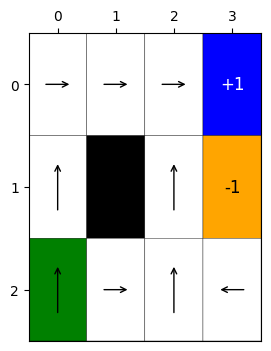



----SEMILLA 5----


Penalización del entorno: -5
Penalización de peligro: -1
Estocasticidad del entorno: 0.9
Número de episodios: 100
Alpha: 0.9
Gamma: 0.5
Epsilon: 0.5
Decaimiento de epsilon: 0.05
Decaimiento de alpha: 0.999


----ALGORITMO QLEARNING----

 
Número de episodios: 100
Estado inicial: (2,0)
Personas a rescatar: [(0, 3)]
Tamaño de la ciudad: 3 x 4
Tiempo de ejecución del Algoritmo: 0.03 segundos

 
----QTabla----

 
[[[ 0.         -7.73986959 -9.41497155  0.        ]
  [ 0.         -7.21179208  0.         -7.68515236]
  [ 0.         -5.66643423 -5.52594134 -5.90376876]
  [ 0.          0.          0.          0.        ]]

 [[-9.29070447  0.         -9.58512213  0.        ]
  [ 0.          0.          0.          0.        ]
  [-6.81385468 -6.51791456 -8.25394296  0.        ]
  [ 0.          0.          0.          0.        ]]

 [[-9.68474029 -8.96681505  0.          0.        ]
  [ 0.         -7.78513793  0.         -9.59068075]
  [-9.22439195 -5.50000026  0.         -9

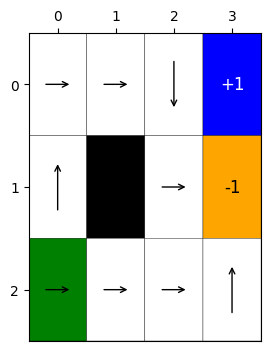

----ITERACIÓN DE POLÍTICAS----

 
Número de iteraciones realizadas: 100
Tiempo de ejecución: 0.024002790451049805

 
----Tabla de utilidades final----

 
Estado     Valor
(0, 0) -8.420260
(0, 1) -7.112294
(0, 2) -4.693986
(0, 3)  1.000000
(1, 0) -8.789117
(1, 2) -5.759423
(1, 3) -1.000000
(2, 0) -9.025519
(2, 1) -8.457313
(2, 2) -7.682918
(2, 3) -5.642073

 
----POLÍTICA OBTENIDA CON ITERACIÓN DE POLÍTICAS----
"(0, 0)": "RIGHT"
"(0, 1)": "RIGHT"
"(0, 2)": "RIGHT"
"(1, 0)": "UP"
"(1, 2)": "RIGHT"
"(2, 0)": "RIGHT"
"(2, 1)": "RIGHT"
"(2, 2)": "RIGHT"
"(2, 3)": "UP"
----MAPA DE LA POLÍTICA CON ITERACIÓN DE POLÍTICAS----

 


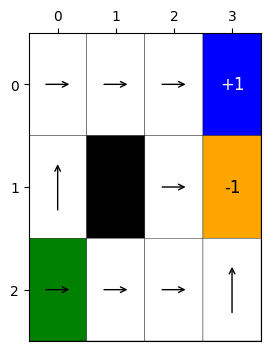

In [4]:

if __name__ == '__main__':
    # Cargamos el json, descomentar el deseado o introducir otro
    archivo_json = './initial-rl-instances/lesson5-rl.json'
    # archivo_json = './initial-rl-instances/instance-10-10-12-4-11-1111--rl.json'
    # archivo_json = ...

    # Parámetro necesario para dibujar la política
    json_dir = os.path.join(os.getcwd(), archivo_json)

    
    # Inicializamos los parámetros en formato de vector para generar semillas
    penalizacion_entorno = [-0.04, -0.5, -5]
    penalizacion_peligro = [-5, -1, -10]
    estocasticidad_entorno = [0.7, 0.8, 0.9]
    numero_episodios = [100, 500, 1000]
    alpha = [0.2, 0.5, 0.9]
    gamma = [0.9, 0.5, 0.2]
    epsilon = [0.2, 0.3, 0.5]
    decaimiento_epsilon = [0.05, 0.01, 0.02]
    decaimiento_alpha = [0.999, 0.995, 0.99]

    # Generamos hasta 5 semillas
    semillas = random.sample(list(itertools.product(
        penalizacion_entorno,
        penalizacion_peligro,
        estocasticidad_entorno,
        numero_episodios,
        alpha,
        gamma,
        epsilon,
        decaimiento_epsilon,
        decaimiento_alpha
    )),
    5
    )
    # Iterar sobre las semillas en cada llamada
    for i, semilla in enumerate(semillas):
        penalizacion_entorno, penalizacion_peligro, estocasticidad_entorno, numero_episodios, alpha, gamma, epsilon, decaimiento_epsilon, decaimiento_alpha = semilla
        
        print(f"----SEMILLA {i + 1}----")
        print("\n")
        print(f"Penalización del entorno: {penalizacion_entorno}")
        print(f"Penalización de peligro: {penalizacion_peligro}")
        print(f"Estocasticidad del entorno: {estocasticidad_entorno}")
        print(f"Número de episodios: {numero_episodios}")
        print(f"Alpha: {alpha}")
        print(f"Gamma: {gamma}")
        print(f"Epsilon: {epsilon}")
        print(f"Decaimiento de epsilon: {decaimiento_epsilon}")
        print(f"Decaimiento de alpha: {decaimiento_alpha}")
        print("\n")

        # Llamar a Entorno y Agente con las semillas correspondientes
        entorno = Entorno(archivo_json, penalizacion_entorno, penalizacion_peligro, estocasticidad_entorno)
        agente = Agente(entorno, alpha, gamma, epsilon, decaimiento_epsilon, json_dir, decaimiento_alpha)
        agente.ejecutar_algoritmo(numero_episodios)
        # Parte correspondiente a la evaluación extraordinaria 
        agente.iteracion_de_politicas()
        print("\n")


    

# Main alternativo con valores singulares

***************************************************************************************
Penalización del entorno: -0.04
Penalización de peligro: -5
Estocasticidad del entorno: 0.8
Número de episodios: 1000
Alpha: 0.2
Gamma: 0.9
Epsilon: 0.2
Decaimiento de epsilon: 0.05
Decaimiento de alpha: 0.999


----ALGORITMO QLEARNING----

 
Número de episodios: 1000
Estado inicial: (2,0)
Personas a rescatar: [(0, 3)]
Tamaño de la ciudad: 3 x 4
Tiempo de ejecución del Algoritmo: 0.46 segundos

 
----QTabla----

 
[[[ 0.00000000e+00  6.41590171e-01 -3.36709529e-02  0.00000000e+00]
  [ 0.00000000e+00  7.94289251e-01  0.00000000e+00 -1.71542441e-02]
  [ 0.00000000e+00  9.70518975e-01 -1.08827321e-02 -8.00000000e-03]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]]

 [[ 4.95120913e-01  0.00000000e+00 -5.77944117e-02  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 6.85422464e-01 -7.35390850e-02 -1.05339174e-01  0.00000000e+00]
  [ 0.00000000e+

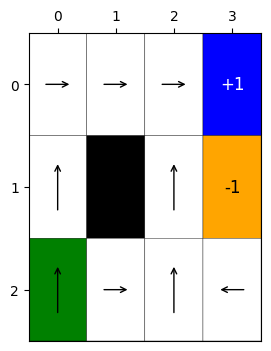

----ITERACIÓN DE POLÍTICAS----

 
Número de iteraciones realizadas: 1000
Tiempo de ejecución: 0.23904848098754883

 
----Tabla de utilidades final----

 
Estado     Valor
(0, 0)  0.318704
(0, 1)  0.474517
(0, 2)  0.714607
(0, 3)  1.000000
(1, 0)  0.189467
(1, 2)  0.384517
(1, 3) -1.000000
(2, 0)  0.109310
(2, 1)  0.143269
(2, 2)  0.254540
(2, 3)  0.053269

 
----POLÍTICA OBTENIDA CON ITERACIÓN DE POLÍTICAS----
"(0, 0)": "RIGHT"
"(0, 1)": "RIGHT"
"(0, 2)": "RIGHT"
"(1, 0)": "UP"
"(1, 2)": "UP"
"(2, 0)": "UP"
"(2, 1)": "RIGHT"
"(2, 2)": "UP"
"(2, 3)": "LEFT"
----MAPA DE LA POLÍTICA CON ITERACIÓN DE POLÍTICAS----

 


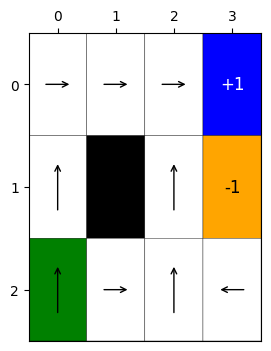

In [3]:
if __name__ == '__main__':
    # Cargamos el json, descomentar el deseado o introducir otro
    archivo_json = './initial-rl-instances/lesson5-rl.json'
    # archivo_json = './initial-rl-instances/instance-10-10-12-4-11-1111--rl.json'
    # archivo_json = ...
    # Parámetro necesario para dibujar la política
    json_dir = os.path.join(os.getcwd(), archivo_json)
    # Inicializamos los parámetros
    penalizacion_entorno = -0.04
    penalizacion_peligro = -5
    estocasticidad_entorno = 0.8
    numero_episodios = 1000
    alpha = 0.2
    gamma = 0.9
    epsilon = 0.2
    decaimiento_epsilon = 0.05
    decaimiento_alpha = 0.999
    
    print("***************************************************************************************")
    print(f"Penalización del entorno: {penalizacion_entorno}")
    print(f"Penalización de peligro: {penalizacion_peligro}")
    print(f"Estocasticidad del entorno: {estocasticidad_entorno}")
    print(f"Número de episodios: {numero_episodios}")
    print(f"Alpha: {alpha}")
    print(f"Gamma: {gamma}")
    print(f"Epsilon: {epsilon}")
    print(f"Decaimiento de epsilon: {decaimiento_epsilon}")
    print(f"Decaimiento de alpha: {decaimiento_alpha}")
    print("\n")
    # Definimos el entorno con las variables parametrizadas
    entorno = Entorno(archivo_json, penalizacion_entorno, penalizacion_peligro,
                      estocasticidad_entorno)
    # Inicializamos el Algoritmo
    agente = Agente(entorno, alpha, gamma, epsilon, decaimiento_epsilon, json_dir,decaimiento_alpha)

    # Ejecutamos el Algoritmo con el nº de episodios y obtenemos la política y la imprimimos
    # Posteriormente la dibujamos
    agente.ejecutar_algoritmo(numero_episodios)
    agente.iteracion_de_politicas()



### 4.3 Estudio y mejora de los algoritmos
Una vez implementado el entorno y el algoritmo, se debe estudiar su comportamiento, considerando un buen estudio/análisis sobre los distintos parámetros, y también en función de la dimensionalidad y complejidad del escenario.

Para ello se debe estudiar la convergencia del algoritmo, la calidad de las políticas obtenidas, la influencia de los distintos valores de los argumentos en el $Q(s,a)$ aprendido. Su implementación debe optimizar el código tanto en tiempo de computación como en asignación de memoria. También son importantes factores como el tamaño máximo del problema que se puede resolver (sin desbordamiento de memoria) o el efecto de utilizar escenarios más complejos. Además, se pueden proponer implementaciones alternativas que aumenten la eficiencia de los algoritmos.

### 4.4 Memoria
Además de la libreta que contiene la implementación, el trabajo consiste en la elaboración de una memoria, que tendrá como fecha de entrega límite el final del semestre docente, junto con la memoria de la práctica 1.

En particular, entre otros temas que el estudiante considere de interés para discutir, el la memoria deberá incluir al menos:
- Una breve descripción del problema, una descripción de cómo se ha implementado el algoritmo, la evaluación del desempeño y la descripción de las mejoras si existen.
- El efecto de los distintos parámetros tanto en el entorno como en el algoritmo Q-learning.
- Debe proporcionarse al menos un mecanismo de exploración.
- Además de su descripción y motivación, se debe incluir un análisis donde se estudie la convergencia de valores $Q(s,a)$.
- Es necesaria poder obtener una política a partir de la Q-tabla.

El informe no debe incluir figuras con código fuente, a menos que sea necesario para explicar algún concepto clave (estructuras de datos, mejoras de eficiencia, etc.). En tales casos, se permite incluir pseudocódigo con el formato adecuado.

## 5. Presentación y evaluación
Es muy recomendable realizar el trabajo en grupo (por parejas), aunque se puede realizar de forma individual. La fecha límite de presentación es el 15 de diciembre de 2023. Los exámenes orales (entrevistas) para la evaluación se realizarán la semana siguiente y de forma individual.

Algunas consideraciones relacionadas con la evaluación:
- A esta práctica le corresponde el 70% de la nota de práctica. La práctica 1 (30%) debe haberse entregado y evaluado para aprobar la asignatura. Los envíos fuera de plazo (junto con la práctica 2) o en caso de haber suspendido se evaluarán globalmente pero con una penalización del 10%, por lo que los estudiantes sólo podrán obtener el 90% de la nota de laboratorio si se da el caso.
- La asistencia a las prácticas no es obligatoria, pero será la mejor base para la resolución exitosa de las mismas.
- Recordar que las dudas y preguntas sobre las prácticas de laboratorio deben resolverse principalmente en las sesiones de laboratorio.
- El trabajo será evaluado mediante una entrevista individual (examen) con los profesores. Las fechas de las entrevistas se publicarán con cierta antelación en Campus Virtual.
- Proporcionaremos un conjunto de casos de prueba preliminares (varios escenarios) que deben resolverse correctamente. En caso contrario, la práctica no se considerará aprobada.
- Es obligatorio realizar la entrevista y responder, de forma individual, a una serie de preguntas sobre la organización del código y sobre cuestiones relacionadas.
- En la evaluación no continua requeriremos además la implementación del Algoritmo de Iteración de Políticas. También se pueden requerir características adicionales.